<a href="https://colab.research.google.com/github/kpLEE-HYU/assignment_hyu/blob/assignment/gwang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Fresnel Equation calculation & plot Tool**



### ✅*** If you want to run this code, please shift + Enter from the first line to the last line ***✅



 This tool is for calculating and plotting the reflection & transmission coefficients defined by Fresnel equation.

# 🥇Function to get each coefficient
 This is function named fresnel to get each coefficient (reflection & transmission coefficients for TE & TM wave).

 This function needs 3 inputs (n1, n2 & incidence angle in degrees)
 
 The value of all coefficients are expressed by absolute value (magnitude).
 You can also get Brewster's angle and critical angle in degrees. 

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import math
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 

def fresnel(n1,n2,theta):

    rad = math.pi * (theta/180)
    n = n2/n1

    crtang = np.arcsin(n)
    crtang = math.degrees(crtang)
    brwsang = np.arctan(n)
    brwsang = math.degrees(brwsang)

    # to get coefficient

    rt = ( math.cos(rad) - (n**2 - math.sin(rad)**2)**(1/2) ) / ( math.cos(rad) + (n**2 - math.sin(rad)**2)**(1/2) )
    tt = 2*np.cos(rad) / ( np.cos(rad) + (n**2 - np.sin(rad)**2)**(1/2) )
    rp = ( (n**2 - math.sin(rad)**2)**(1/2) - (n**2)*(math.cos(rad)) ) / ( (n**2 - math.sin(rad)**2)**(1/2) + (n**2)*(math.cos(rad)) )
    tp = 2*n*np.cos(rad) / ( (n**2 - np.sin(rad)**2)**(1/2) + (n**2)*(np.cos(rad)) )

    pit = 2*np.arctan(( ( np.sin(rad)**2 - n**2 )**(1/2) ) / np.cos(rad))
    pip = 2*np.arctan( ( ( np.sin(rad)**2 - n**2 )**(1/2) ) / ( (n**2)*np.cos(rad) ) ) - np.pi

    pit = np.degrees(pit)
    pip = np.degrees(pip)
    if brwsang < theta < crtang:
      pip = -180

    rt = abs(rt)
    tt = (tt)
    rp = abs(rp)
    tp = (tp)

    print('-' * 60)
    if n < 1: print('This is internal reflection')
    if n > 1: print('This is external reflection')
    print('-' * 60)
    print('The magnitudes of each coefficient are')
    print('rt: {}'.format(rt))
    print('tt: {}'.format(tt))
    print('rp: {}'.format(rp))
    print('tp: {}'.format(tp))
    print('-' * 60)
    print('The critical angel is {} degrees'.format(crtang))
    print('The Brewster angel is {} degrees'.format(brwsang))
    print('-' * 60)
    print('The pahse changes in degrees are')
    print('pit: {}'.format(pit))
    print('pip: {}'.format(pip))
    print('-' * 60)

# ✅Simulation
 If n = n2/n1 is smaller than 1, we call this internal reflection. 
 
 At this time, if the incidence angle is bigger than the critical angle the reflection coefficients for TE & TM remains 1. 
 
 There are no phase changes until the Brewster's angle, but if incidence angle is bigger than Brewster's angle, the phase changes occur.



**> @ normal incidence (Incidence angle = 0)**



In [ ]:
fresnel(1.44, 1, 0)

------------------------------------------------------------
This is internal reflection
------------------------------------------------------------
The magnitudes of each coefficient are
rt: 0.18032786885245902
tt: 1.180327868852459
rp: 0.18032786885245905
tp: 1.1803278688524592
------------------------------------------------------------
The critical angel is 43.982963130358684 degrees
The Brewster angel is 34.77783136636388 degrees
------------------------------------------------------------
The pahse changes in degrees are
pit: nan
pip: nan
------------------------------------------------------------




**> @ bigger than Brewster's angle (34.x) and smaller than critical angle (43.x)**



In [ ]:
fresnel(1.44, 1, 40)

------------------------------------------------------------
This is internal reflection
------------------------------------------------------------
The magnitudes of each coefficient are
rt: 0.48909887948188446
tt: 1.4890988794818845
rp: 0.16860652755159003
tp: 1.6827933996742896
------------------------------------------------------------
The critical angel is 43.982963130358684 degrees
The Brewster angel is 34.77783136636388 degrees
------------------------------------------------------------
The pahse changes in degrees are
pit: nan
pip: -180
------------------------------------------------------------




**> @ bigger than critical angle**


In [ ]:
fresnel(1.44, 1, 60)

------------------------------------------------------------
This is internal reflection
------------------------------------------------------------
The magnitudes of each coefficient are
rt: 0.9999999999999999
tt: nan
rp: 0.9999999999999999
tp: nan
------------------------------------------------------------
The critical angel is 43.982963130358684 degrees
The Brewster angel is 34.77783136636388 degrees
------------------------------------------------------------
The pahse changes in degrees are
pit: 91.96432357509781
pip: -49.97072181367179
------------------------------------------------------------


 If n = n2/n1 is bigger than 1, we call this **external** reflection. 
 
 There are no phase changes since all coefficients are actual numbers.

 Also there does not exist the critical angle.

In [ ]:
fresnel(1, 1.44, 0)

------------------------------------------------------------
This is external reflection
------------------------------------------------------------
The magnitudes of each coefficient are
rt: 0.180327868852459
tt: 0.819672131147541
rp: 0.180327868852459
tp: 0.819672131147541
------------------------------------------------------------
The critical angel is nan degrees
The Brewster angel is 55.22216863363612 degrees
------------------------------------------------------------
The pahse changes in degrees are
pit: nan
pip: nan
------------------------------------------------------------


# 🥇Function to plot each coefficient & phase changes
 This function named fresnelplot is to plot each coefficient & phase changes.

 This function needs 2 refractive index(n1, n2) for inputs.

 If you want to know about internal reflection, you might get the plot of reflection coefficients and phase changes.

  If you want to know about external reflection, you might get the plot of reflection coefficients & transmission coefficients.

  And also you might get the critical, Brewster's angle and coefficients @ normal incidence.

In [ ]:
def fresnelplot(n1, n2):

    n = n2/n1
    # to get critical angle
    crtang = np.arcsin(n)
    crtang = math.degrees(crtang)
    # to get brewster angle
    brwsang = np.arctan(n)
    brwsang = math.degrees(brwsang)

    # Internal reflection
    if n < 1:
        # for coefficient rt, rp
        theta = np.linspace(0,crtang,10000)
        rad = math.pi * (theta/180)
        # for phase change
        theta2 = np.linspace(crtang, 90, 10000)
        rad2 = math.pi * (theta2/180)
        # for coefficient tt, tp
        theta3 = np.linspace(0,90,10000)
        rad3 = math.pi * (theta3/180)

        # to get coefficient
        rt = ( np.cos(rad) - (n**2 - np.sin(rad)**2)**(1/2) ) / ( np.cos(rad) + (n**2 - np.sin(rad)**2)**(1/2) )
        tt = 2*np.cos(rad3) / ( np.cos(rad3) + (n**2 - np.sin(rad3)**2)**(1/2) )
        rp = ( (n**2 - np.sin(rad)**2)**(1/2) - (n**2)*(np.cos(rad)) ) / ( (n**2 - np.sin(rad)**2)**(1/2) + (n**2)*(np.cos(rad)) )
        tp = 2*n*np.cos(rad3) / ( (n**2 - np.sin(rad3)**2)**(1/2) + (n**2)*(np.cos(rad3)) )

        rt = (rt)
        tt = (tt)
        rp = (rp)
        tp = (tp)

        # to get phase change
        pit = 2*np.arctan(( ( np.sin(rad2)**2 - n**2 )**(1/2) ) / np.cos(rad2))
        pip = 2*np.arctan( ( ( np.sin(rad2)**2 - n**2 )**(1/2) ) / ( (n**2)*np.cos(rad2) ) ) - np.pi

        pit = np.degrees(pit)
        pip = np.degrees(pip)

        # show plot and output
        print('-' * 60)
        print('This is internal reflection')
        print('-' * 60)
        print('The critical angel is {} degrees'.format(crtang))
        print('The Brewster angel is {} degrees'.format(brwsang))
        print('-' * 60)
        print('The coefficients for normal incidence are')
        print('Reflection coefficient: {}'.format(rt[0]))
        print('Transmission coefficient: {}'.format(tt[0]))
        print('-' * 60)

        plt.figure(figsize=(20,10))

        plt.subplot(121)
        plt.plot(theta, rt,'blue')
        plt.plot(theta, rp, 'orange')
        plt.hlines(y=1, xmin=crtang, xmax=90, color='blue')
        plt.hlines(y=-1, xmin=crtang, xmax=90, color='orange')
        plt.xlabel('Incidence angle', fontsize=20)
        plt.ylabel('Value of reflection coefficients', fontsize=20)
        plt.legend(['rt', 'rp'], fontsize=15, loc='upper left')
        plt.grid(True)

        plt.subplot(122)
        plt.plot(theta2, pit, 'blue')
        plt.plot(theta2, pip, 'orange')
        plt.hlines(y=0, xmin=0, xmax=crtang, color='blue')
        plt.hlines(y=0, xmin=0, xmax=brwsang, color='orange')
        plt.hlines(y=-180, xmin=brwsang, xmax=crtang, color='orange')
        plt.vlines(x=brwsang, ymin=0, ymax=-180, color='orange')
        plt.xlabel('Incidence angle', fontsize=20)
        plt.ylabel('Phase changes in degrees', fontsize=20)
        plt.legend(['pit', 'pip'], fontsize=15)
        plt.grid(True)
        
        plt.show()

    # External reflection
    if n > 1:
        # for coefficient rt, rp
        theta = np.linspace(0,90,10000)
        rad = math.pi * (theta/180)

        # for coefficient tt, tp
        theta3 = np.linspace(0,90,10000)
        rad3 = math.pi * (theta3/180)


        # to get coefficient
        rt = ( np.cos(rad) - (n**2 - np.sin(rad)**2)**(1/2) ) / ( np.cos(rad) + (n**2 - np.sin(rad)**2)**(1/2) )
        tt = 2*np.cos(rad3) / ( np.cos(rad3) + (n**2 - np.sin(rad3)**2)**(1/2) )
        rp = ( (n**2 - np.sin(rad)**2)**(1/2) - (n**2)*(np.cos(rad)) ) / ( (n**2 - np.sin(rad)**2)**(1/2) + (n**2)*(np.cos(rad)) )
        tp = 2*n*np.cos(rad3) / ( (n**2 - np.sin(rad3)**2)**(1/2) + (n**2)*(np.cos(rad3)) )

        rt = (rt)
        tt = (tt)
        rp = (rp)
        tp = (tp)

        # show plot and output
        print('-' * 60)
        print('This is external reflection')
        print('-' * 60)
        print('The critical angel is {} degrees'.format(crtang))
        print('The Brewster angel is {} degrees'.format(brwsang))
        print('-' * 60)
        print('The coefficients for normal incidence are')
        print('Reflection coefficient: {}'.format(rt[0]))
        print('Transmission coefficient: {}'.format(tt[0]))
        print('-' * 60)
        
        plt.figure(figsize=(20,10))

        plt.subplot(121)
        plt.plot(theta, rt,'blue')
        plt.plot(theta, rp, 'orange')
        plt.xlabel('Incidence angle', fontsize=20)
        plt.ylabel('Value of reflection coefficients', fontsize=20)
        plt.legend(['rt', 'rp'], fontsize=15)
        plt.grid(True)

        plt.subplot(122)
        plt.plot(theta3, tt, 'blue')
        plt.plot(theta3, tp, 'orange')
        plt.xlabel('Incidence angle', fontsize=20)
        plt.ylabel('Value of transmission coefficients', fontsize=20)
        plt.legend(['tt', 'tp'], fontsize=15)
        plt.grid(True)
        
        plt.show()

# ✅Simulation

# @ Internal reflection

------------------------------------------------------------
This is internal reflection
------------------------------------------------------------
The critical angel is 43.982963130358684 degrees
The Brewster angel is 34.77783136636388 degrees
------------------------------------------------------------
The coefficients for normal incidence are
Reflection coefficient: 0.18032786885245902
Transmission coefficient: 1.180327868852459
------------------------------------------------------------


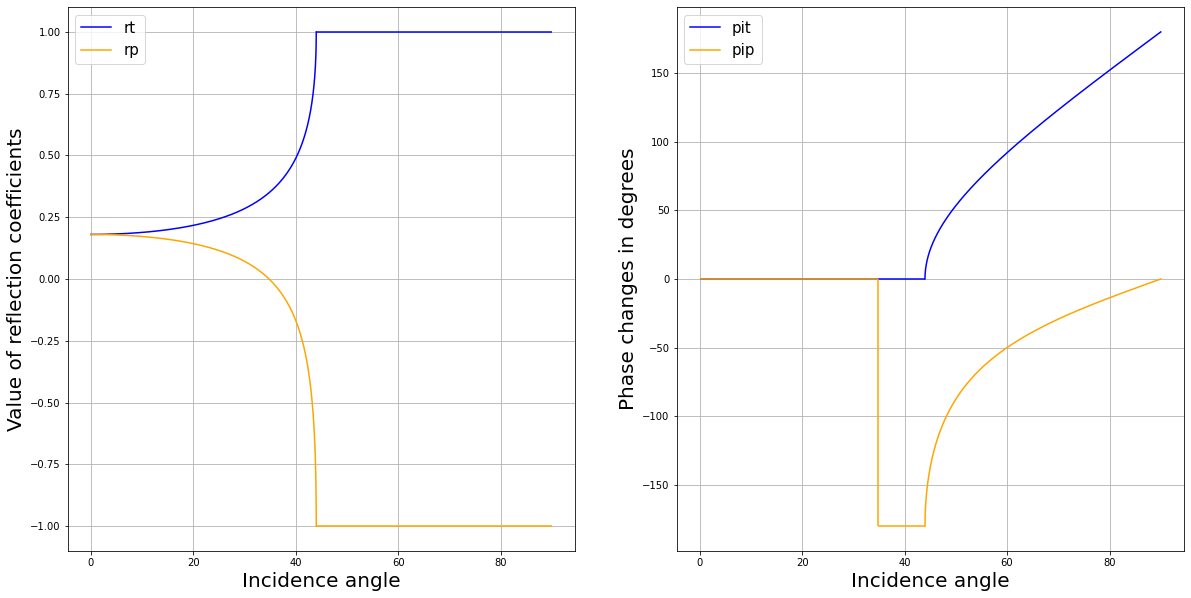

In [ ]:
fresnelplot(1.44,1)

# @ External reflection

------------------------------------------------------------
This is external reflection
------------------------------------------------------------
The critical angel is nan degrees
The Brewster angel is 55.22216863363612 degrees
------------------------------------------------------------
The coefficients for normal incidence are
Reflection coefficient: -0.180327868852459
Transmission coefficient: 0.819672131147541
------------------------------------------------------------


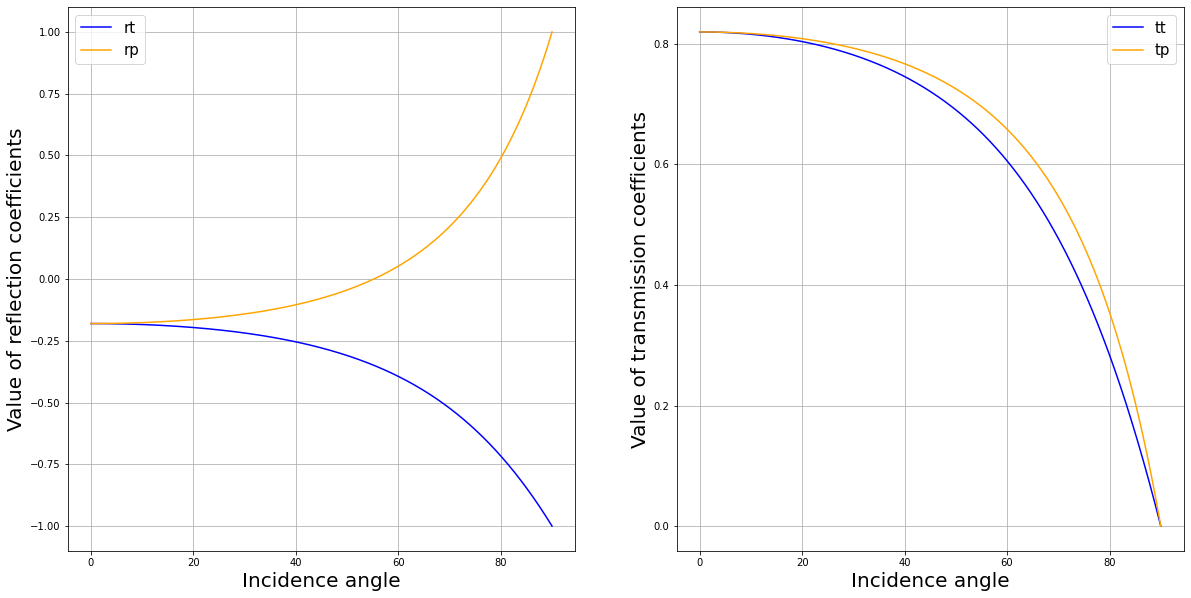

In [ ]:
fresnelplot(1,1.44)